### Polynomial Regression
1. Concept
   - Polynomial Regression is a from of Linear Regression but the model extended by adding polynomial variables of the original features.
   - Idea: If the data can't be fitted well with straight line (nonlinear relationship), we create new variables that are powers of the original feature. 
2. Formula
   - The polynomial Regression model assumes:
   $$
   \hat{y} = w_0 + w_1 \cdot x + w_2 \cdot x^2 + \cdots + w_d \cdot x^d
   $$
   - Absorb b into the weight vector:
   $$
   \hat{y} = X \cdot \theta
   $$
   - where:
   $$
   \theta = 
   \begin{bmatrix}
   b \\ w_1 \\ w_2 \\ \vdots \\ w_d
   \end{bmatrix}
   $$
   $$
   X = 
   \begin{bmatrix}
   1 & x_1 & x^2_1 & \cdots & x^d_1 \\
   1 & x_2 & x^2_2 & \cdots & x^d_2 \\
   \cdots & \cdots & \cdots & \ddots & \cdots \\
   1 & x_m & x^2_m & \cdots & x^d_m
   \end{bmatrix} 
   $$

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


### Polynomial Regression use library

In [70]:
np.random.seed(0)

X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2 * X  + 5 * X ** 2 + np.random.randn(100, 1)

In [71]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [72]:
X_vals = np.linspace(-2, 2, 100).reshape(-1, 1)
y_vals = lr.predict(X_vals)

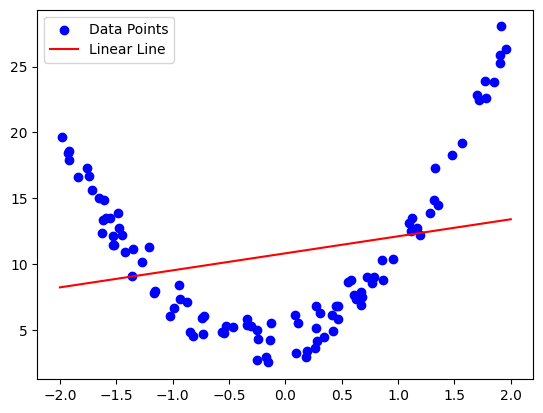

In [73]:
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_vals, y_vals, color="red", label="Linear Line")
plt.legend()
plt.show()

In [74]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [75]:
print(X_poly)

[[ 0.19525402  0.03812413]
 [ 0.86075747  0.74090341]
 [ 0.4110535   0.16896498]
 [ 0.17953273  0.032232  ]
 [-0.3053808   0.09325743]
 [ 0.58357645  0.34056148]
 [-0.24965115  0.0623257 ]
 [ 1.567092    2.45577735]
 [ 1.85465104  3.43973049]
 [-0.46623392  0.21737407]
 [ 1.16690015  1.36165597]
 [ 0.11557968  0.01335866]
 [ 0.27217824  0.074081  ]
 [ 1.70238655  2.89811998]
 [-1.71585577  2.94416101]
 [-1.6514828   2.72739544]
 [-1.91912641  3.68304618]
 [ 1.33047938  1.77017539]
 [ 1.112627    1.23793885]
 [ 1.48004859  2.19054384]
 [ 1.91447337  3.66520828]
 [ 1.19663426  1.43193354]
 [-0.15408255  0.02374143]
 [ 1.12211671  1.2591459 ]
 [-1.5269023   2.33143062]
 [ 0.55968409  0.31324628]
 [-1.42658685  2.03515004]
 [ 1.77867567  3.16368713]
 [ 0.08739329  0.00763759]
 [-0.34135224  0.11652135]
 [-0.94177755  0.88694496]
 [ 1.09693476  1.20326586]
 [-0.17539867  0.03076469]
 [ 0.2737358   0.07493129]
 [-1.9248408   3.7050121 ]
 [ 0.47054199  0.22140976]
 [ 0.44838289  0.20104722]
 

In [76]:
pr = LinearRegression()
pr.fit(X_poly, y)

LinearRegression()

In [77]:
print(pr.coef_, pr.intercept_)

[[1.96859828 4.88702352]] [4.34050076]


In [78]:
X_vals_poly = poly_features.transform(X_vals)
y_vals = pr.predict(X_vals_poly)

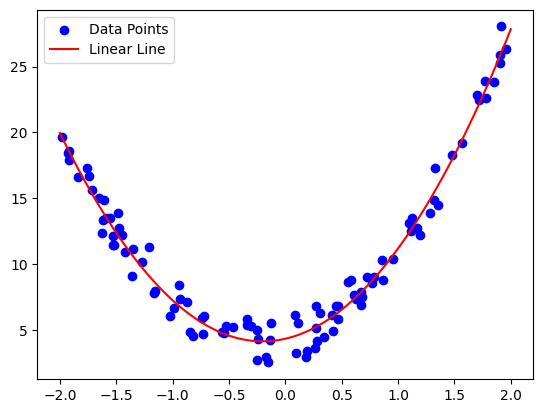

In [79]:
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_vals, y_vals, color="red", label="Linear Line")
plt.legend()
plt.show()

### Polynominal Regression without library

In [80]:
X_poly = np.hstack([np.ones((X.shape[0], 1)), X, X ** 2])
X_vals_poly = np.hstack([np.ones((X.shape[0], 1)), X_vals, X_vals ** 2])

In [81]:
def solve(X, y):
    X_tran = X.transpose()
    return np.linalg.pinv(X_tran @ X) @ X_tran @ y


In [82]:
theta = solve(X_poly, y)

In [83]:
print(theta)

[[4.34050076]
 [1.96859828]
 [4.88702352]]


In [84]:
y_vals = X_vals_poly @ theta

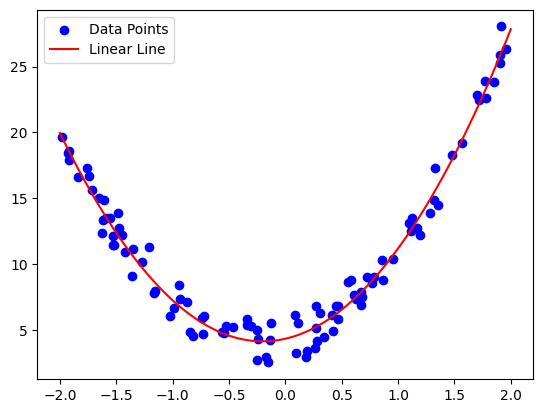

In [85]:
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_vals, y_vals, color="red", label="Linear Line")
plt.legend()
plt.show()                              